Importing dependencies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Loading dataset into pandas dataFrame.
car_dataset = pd.read_csv('/content/car_prediction_data.csv')
car_dataset.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [3]:
car_dataset.shape

(301, 9)

In [4]:
# Getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [12]:
# Encoding these categorical columns or freatures.
car_dataset.replace({'Fuel_Type': {'Petrol':0,'Diesel':1,'CNG':2},
                     'Seller_Type': {'Dealer': 0, 'Individual': 1},
                     'Transmission': {'Manual': 0, 'Automatic': 1}},
                    inplace=True)

In [13]:
car_dataset.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0

In [11]:
print(car_dataset.Car_Name. value_counts())

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64


Splitting the dataset into training and testing data.

In [14]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


In [17]:
mdl1 = LinearRegression()
mdl2 = Lasso()

In [19]:
mdl1.fit(X_train,Y_train)

LinearRegression()

In [20]:
mdl2.fit(X_train,Y_train)

Lasso()

In [22]:
# Predicting the error score for the training data in both the models.
training_data_prediction1 = mdl1.predict(X_train)
training_data_prediction2 = mdl2.predict(X_train)

training_data_error1 = metrics.r2_score(Y_train, training_data_prediction1)
training_data_error2 = metrics.r2_score(Y_train, training_data_prediction2)

print("Error Score for Linear Regression of training data: ", training_data_error1)
print("Error Score for Lasso Regression of training data: ", training_data_error2)

Error Score for Linear Regression of training data:  0.8799451660493711
Error Score for Lasso Regression of training data:  0.8427856123435794


Visualizing the predicted prices and actual prices.

For training Data.

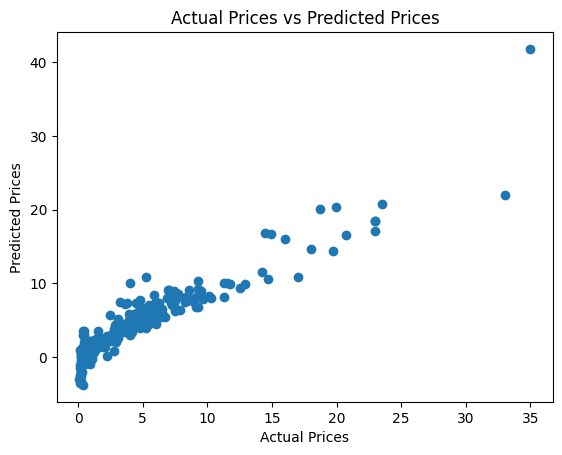

In [24]:
# plot is for Linear Regression Model.
plt.scatter(Y_train, training_data_prediction1)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

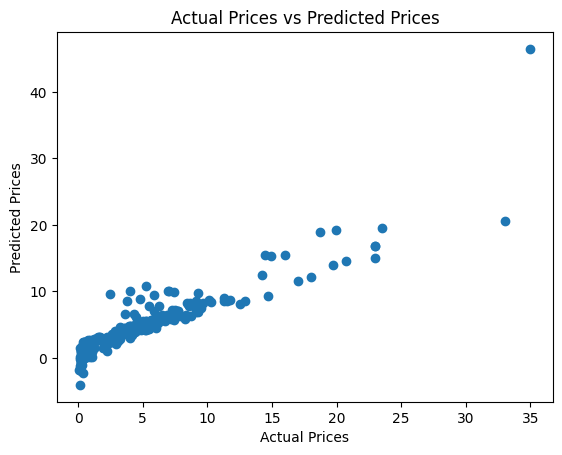

In [25]:
# plot is for Lasso Regression Model.
plt.scatter(Y_train, training_data_prediction2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [23]:
#Predicting the error score for the testing data in both the models.
testing_data_prediction1 = mdl1.predict(X_test)
testing_data_prediction2 = mdl2.predict(X_test)

testing_data_error1 = metrics.r2_score(Y_test, testing_data_prediction1)
testing_data_error2 = metrics.r2_score(Y_test, testing_data_prediction2)

print("Error Score for Linear Regression of testing data: ", testing_data_error1)
print("Error Score for Lasso Regression of testing data: ", testing_data_error2)

Error Score for Linear Regression of testing data:  0.8365766715027051
Error Score for Lasso Regression of testing data:  0.8709167941173195


For testing data.

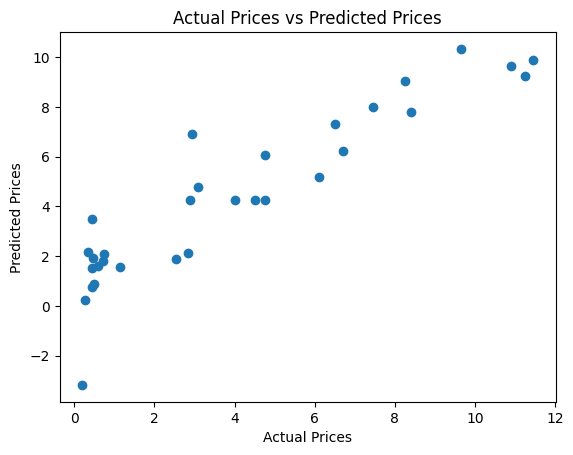

In [26]:
# plot is for Linear Regression Model.
plt.scatter(Y_test, testing_data_prediction1)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

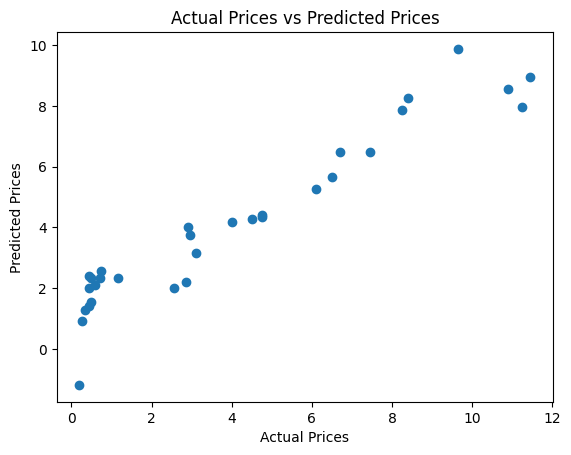

In [27]:
# plot is for Lasso Regression Model.
plt.scatter(Y_test, testing_data_prediction2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Further we can make a predictive system using numpy array and input data.